<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/AM_FRANK_BELMIRO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Feature Engineering

Importando as Bibliotecas

In [145]:
# Load libs

import numpy as np
import pickle
import pandas as pd

#scykit

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#Evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline

#Warnings

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Transformando dados com get_dummies e hot encoder

In [ ]:

# name columns and load txt

colunas = ['ESCT','NDEP','RENDA','TIPOR','VBEM','NPARC','VPARC','TEL','IDADE','RESMS','ENTRADA','CLASSE']
df = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt',sep="\t", names=colunas)
df_test = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt',sep="\t", names=colunas)

#load dataframe to hot encoder

df_hot = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt',sep="\t", names=colunas)
df_test_hot = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt',sep="\t", names=colunas)


In [ ]:
# transform value from categorical columns using get_dummies

df = pd.get_dummies(df, columns=['ESCT'], prefix = ['ESCT'])
df = pd.get_dummies(df, columns=['TEL'], prefix = ['TEL'])
df = pd.get_dummies(df, columns=['TIPOR'], prefix = ['TIPOR'])

df_test = pd.get_dummies(df_test, columns=['ESCT'], prefix = ['ESCT'])
df_test = pd.get_dummies(df_test, columns=['TEL'], prefix = ['TEL'])
df_test = pd.get_dummies(df_test, columns=['TIPOR'], prefix = ['TIPOR'])

# transform values from categorical columns using hot encoder

np_array = df_hot['ESCT'].values
np_array = np_array.reshape(-1,1)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(np_array)
df_hot [['ESCT_0', 'ESCT_1', 'ESCT_2', 'ESCT_3']] = one_hot_encoded
df_hot.drop('ESCT', axis=1)


,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_0,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,0.0,1.0,0.0,0.0
1,0,350,1,468,10,65,0,33,6,0,1,1.0,0.0,0.0,0.0
2,0,1100,0,829,9,125,0,56,48,0,1,1.0,0.0,0.0,0.0
3,0,3000,0,552,12,76,1,31,60,0,1,1.0,0.0,0.0,0.0
4,0,1000,0,809,12,111,0,24,7,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,500,0,437,12,60,0,60,48,0,1,0.0,1.0,0.0,0.0
1496,0,2057,0,301,1,318,0,35,48,0,1,0.0,1.0,0.0,0.0
1497,0,570,0,511,12,71,1,28,144,0,1,1.0,0.0,0.0,0.0
1498,0,360,0,384,12,52,0,33,36,0,1,1.0,0.0,0.0,0.0


Separando as amostras para treino e teste

In [ ]:
seed = 999

# Split the train dataset into features (X) and the target variable (y)
X_train = df.drop('CLASSE', axis=1)
y_train = df['CLASSE']

# Split the test dataset into features (X) and the target variable (y)

X_test = df_test.drop('CLASSE', axis=1)
y_test = df_test['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Sample for Hot Encoder

# Split the train dataset into features (X) and the target variable (y)
X_train_hot = df_hot.drop('CLASSE', axis=1)
y_train_hot = df_hot['CLASSE']

# Split the test dataset into features (X) and the target variable (y)

X_test_hot = df_test_hot.drop('CLASSE', axis=1)
y_test_hot = df_test_hot['CLASSE']

# Scale the features using StandardScaler
scaler_hot = StandardScaler()
X_train_hot = scaler.fit_transform(X_train)
X_test_hot = scaler.transform(X_test)


Regressão Logistica sem Enginering Feature

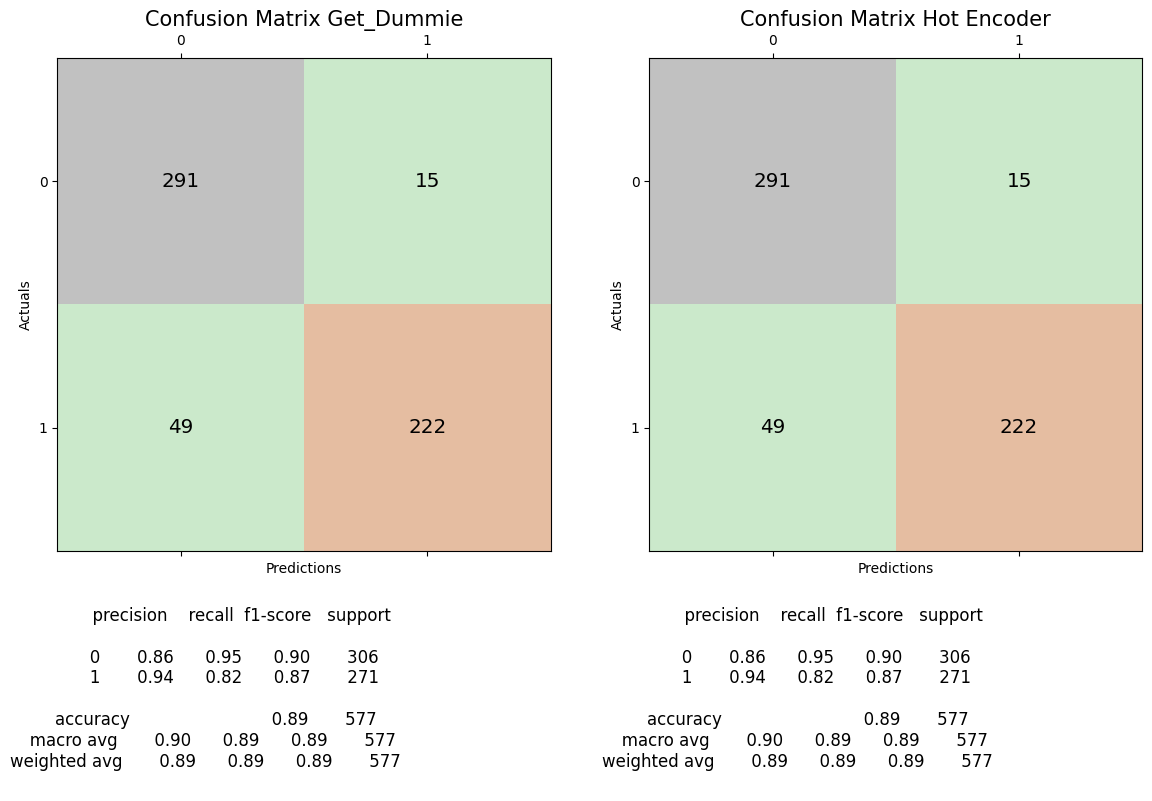

In [ ]:
# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=seed)
model.fit(X_train, y_train)

model_hot = LogisticRegression(solver='liblinear', random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Decision Tree Classifier sem Engineering Feature

> Bloco com recuo



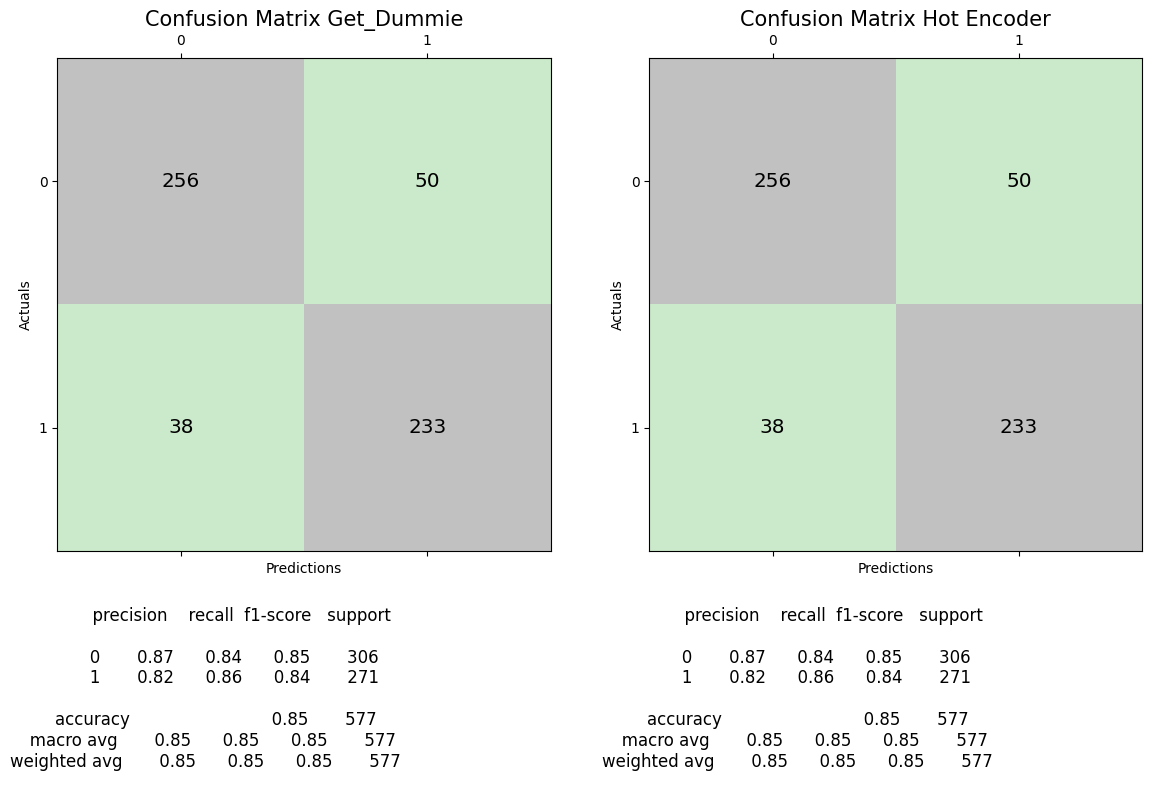

In [ ]:
# Create and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = DecisionTreeClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Random Forest Classifier sem Feature Engineering

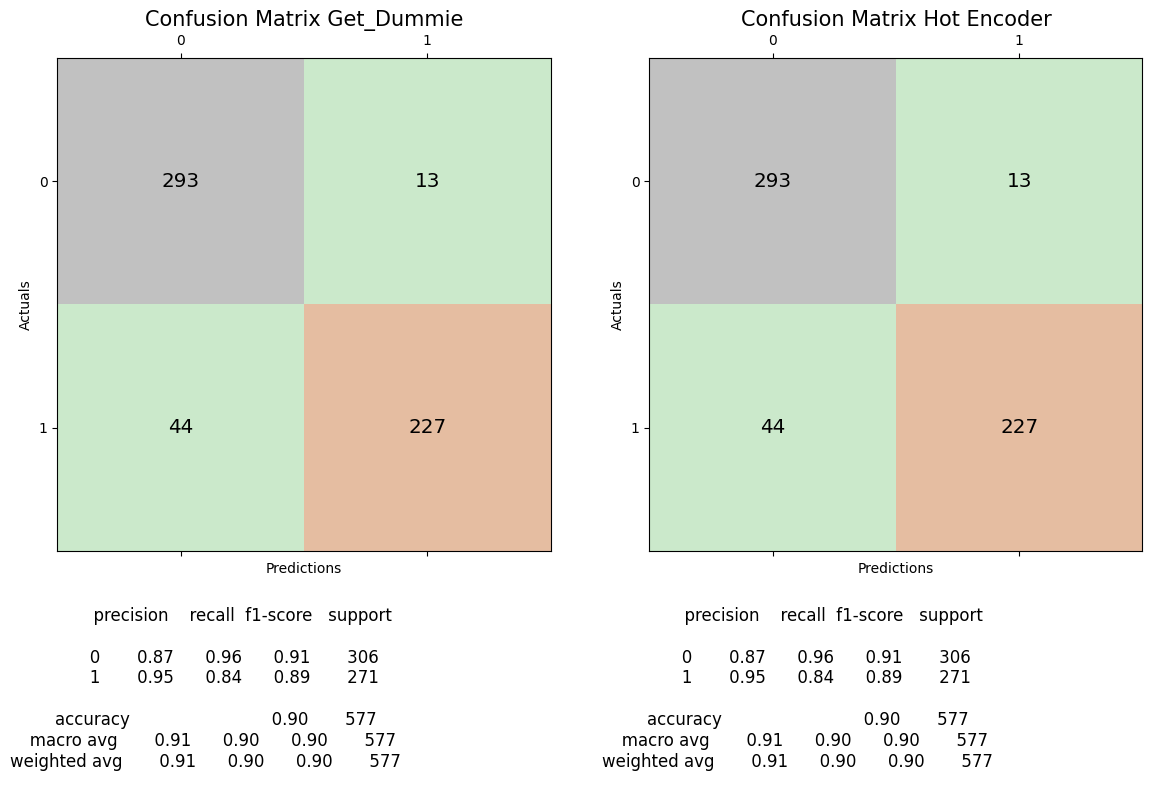

In [ ]:
# Create and train the Random Forest model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = RandomForestClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Gradient Boosting Classifier sem Feature Engineering

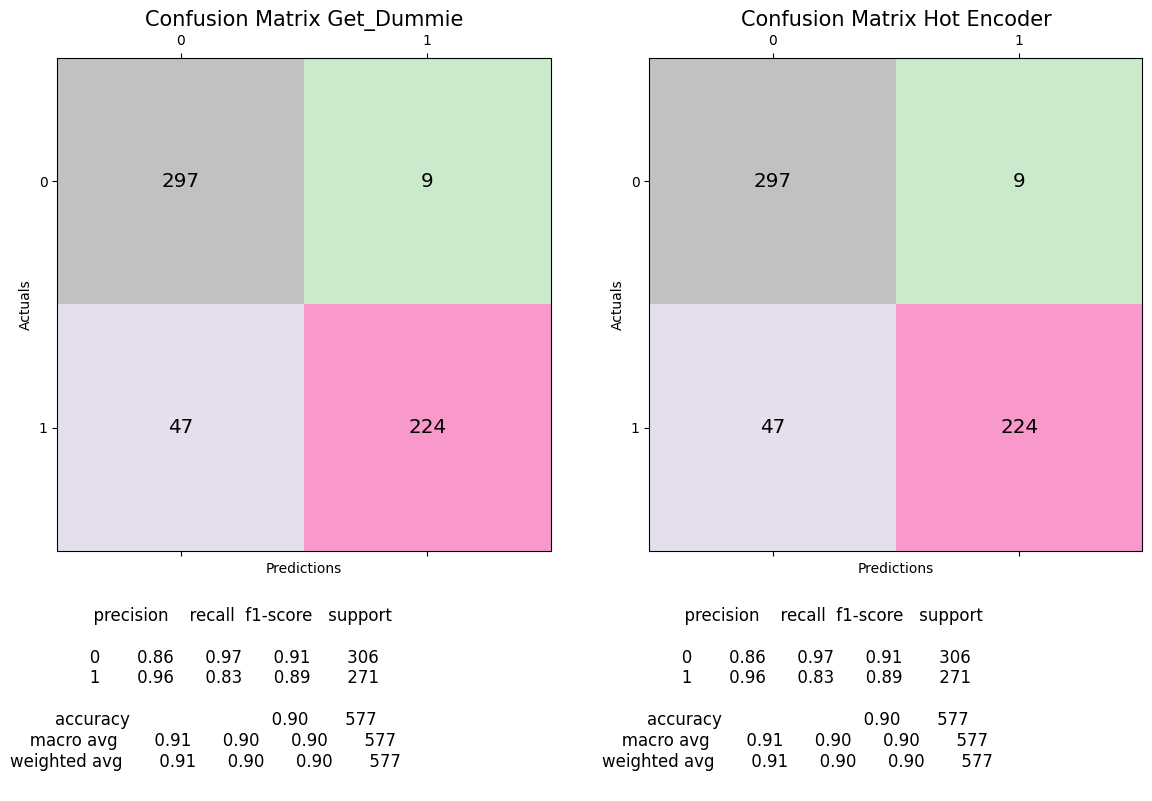

In [ ]:
# Create and train the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = GradientBoostingClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

# 2 - Validação Cruzada

Carregando arquivos do Pickle, ele já vem com amostras de treino, validação e treinamento.

In [11]:
# Load pickle file into train and test samples

outfilename = "/content/drive/MyDrive/Colab Notebooks/data/A602.pickle"
outfilename2 = "/content/drive/MyDrive/Colab Notebooks/data/A621.pickle"
outfilename3 = "/content/drive/MyDrive/Colab Notebooks/data/A627.pickle"
outfilename4 = "/content/drive/MyDrive/Colab Notebooks/data/A636.pickle"
outfilename5 = "/content/drive/MyDrive/Colab Notebooks/data/A652.pickle"

file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)

file = open(outfilename2 , 'rb')
(X_train2 , y_train2 , X_val2 , y_val2 , X_test2 , y_test2) = pickle.load(file)

file = open(outfilename3 , 'rb')
(X_train3 , y_train3 , X_val3 , y_val3 , X_test3 , y_test3) = pickle.load(file)

file = open(outfilename4 , 'rb')
(X_train4 , y_train4 , X_val4 , y_val4 , X_test4 , y_test4) = pickle.load(file)

file = open(outfilename5 , 'rb')
(X_train5 , y_train5 , X_val5 , y_val5 , X_test5, y_test5) = pickle.load(file)

print(f"Shapes A602: ", X_train.shape , y_train.shape, X_val.shape , X_test.shape)
print(f"Shapes A621: ", X_train2.shape , y_train2.shape, X_val2.shape , X_test2.shape)
print(f"Shapes A627: ", X_train3.shape , y_train3.shape, X_val3.shape , X_test3.shape)
print(f"Shapes A636: ", X_train4.shape , y_train4.shape,X_val4.shape , X_test4.shape)
print(f"Shapes A652: ", X_train5.shape , y_train5.shape,X_val5.shape , X_test5.shape)


Shapes A602:  (10178, 24) (10178, 1) (2565, 24) (765, 24)
Shapes A621:  (9549, 24) (9549, 1) (2428, 24) (10080, 24)
Shapes A627:  (9682, 24) (9682, 1) (2235, 24) (10202, 24)
Shapes A636:  (10219, 24) (10219, 1) (2414, 24) (10129, 24)
Shapes A652:  (10012, 24) (10012, 1) (2506, 24) (9582, 24)


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_train2.shape)
print(y_train2.shape)
print(X_train3.shape)
print(y_train3.shape)
print(X_train4.shape)
print(y_train4.shape)
print(X_train5.shape)
print(y_train5.shape)

(10178, 24)
(10178, 1)
(9549, 24)
(9549, 1)
(9682, 24)
(9682, 1)
(10219, 24)
(10219, 1)
(10012, 24)
(10012, 1)


Observado que o target Y continha valores de 0 a 1, por ser um problema de classificação, foi transformado os valores >0 em 1.=

In [24]:
# transform y to 0 and 1

y_train = (y_train > 0).astype(int)
y_val = (y_val > 0).astype(int)
y_test = (y_test > 0).astype(int)

y_train2 = (y_train2 > 0).astype(int)
y_val2 = (y_val2 > 0).astype(int)
y_test2 = (y_test2 > 0).astype(int)

y_train3 = (y_train3 > 0).astype(int)
y_val3 = (y_val3 > 0).astype(int)
y_test3 = (y_test3 > 0).astype(int)

y_train4 = (y_train4 > 0).astype(int)
y_val4 = (y_val4 > 0).astype(int)
y_test4 = (y_test4 > 0).astype(int)

y_train5 = (y_train5 > 0).astype(int)
y_val5 = (y_val5 > 0).astype(int)
y_test5 = (y_train > 0).astype(int)




Unindo  as amostras

In [14]:
X_train = np.vstack((X_train, X_train2,X_train3,X_train4,X_train5))
y_train = np.vstack((y_train, y_train2,y_train3,y_train4,y_train5))
X_val = np.vstack((X_val, X_val2,X_val3,X_val4,X_val5))
y_val = np.vstack((y_val, y_val2,y_val3,y_val4,y_val5))
X_test = np.vstack((X_test, X_test2,X_test3,X_test4,X_test5))
y_test = np.vstack((y_test, y_test2,y_test3,y_test4,y_test5))


Realização do método 3 way hold out:

1) Primeiro ele treina o modelo com os parâmetros default e depois com o GridSeach.

2) Realiza a validação de ambos.

3) Realiza o teste com os valores defaul e com os melhores parâmetros e plota os resultados para comparação.

In [15]:
# Create and train the GradientBoostingClassifier model default values x tunned values
#Three way hold out method

# first train all models
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)

param_grid = {'n_estimators': range(5,150,50),
              'max_depth': range(1,10,3),
              'learning_rate':[0.01,0.1,1]
              }
grid = GridSearchCV(GradientBoostingClassifier(random_state=seed), param_grid)
grid.fit(X_train, y_train)

# second validating

# Make predictions on the test set
y_pred = model.predict(X_val)

y_pred_grid = grid.predict(X_val)

# Evaluate the model
print("Evaluation of Validation values Default x Tunned")
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
print(classification_rep)

accuracy_grid = accuracy_score(y_val, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_val, y_pred_grid)
classification_rep_grid = classification_report(y_val, y_pred_grid)
print(classification_rep_grid)


# third testing with best params

grid = GradientBoostingClassifier(random_state=seed,
                                  learning_rate = grid.best_params_['learning_rate'],
                                  max_depth = grid.best_params_['max_depth'],
                                  n_estimators = grid.best_params_['n_estimators'])
grid.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_grid = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
classification_rep_grid = classification_report(y_test, y_pred_grid)


fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Default', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_grid, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_grid.shape[0]):
    for j in range(conf_matrix_grid.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_grid[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Tunned', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_grid, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()


KeyboardInterrupt: ignored

3 - Classificação Multi-classe

Recarregando os arquivos pickles já que eles foram mudados anteriormente

In [115]:
# Load pickle file into train and test samples

outfilename = "/content/drive/MyDrive/Colab Notebooks/data/A602.pickle"
outfilename2 = "/content/drive/MyDrive/Colab Notebooks/data/A621.pickle"
outfilename3 = "/content/drive/MyDrive/Colab Notebooks/data/A627.pickle"
outfilename4 = "/content/drive/MyDrive/Colab Notebooks/data/A636.pickle"
outfilename5 = "/content/drive/MyDrive/Colab Notebooks/data/A652.pickle"

file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)

file = open(outfilename2 , 'rb')
(X_train2 , y_train2 , X_val2 , y_val2 , X_test2 , y_test2) = pickle.load(file)

file = open(outfilename3 , 'rb')
(X_train3 , y_train3 , X_val3 , y_val3 , X_test3 , y_test3) = pickle.load(file)

file = open(outfilename4 , 'rb')
(X_train4 , y_train4 , X_val4 , y_val4 , X_test4 , y_test4) = pickle.load(file)

file = open(outfilename5 , 'rb')
(X_train5 , y_train5 , X_val5 , y_val5 , X_test5, y_test5) = pickle.load(file)

print(f"Shapes A602: ", X_train.shape , X_val.shape , X_test.shape)
print(f"Shapes A621: ", X_train2.shape , X_val2.shape , X_test2.shape)
print(f"Shapes A627: ", X_train3.shape , X_val3.shape , X_test3.shape)
print(f"Shapes A636: ", X_train4.shape , X_val4.shape , X_test4.shape)
print(f"Shapes A652: ", X_train5.shape , X_val5.shape , X_test5.shape)

Shapes A602:  (10178, 24) (2565, 24) (765, 24)
Shapes A621:  (9549, 24) (2428, 24) (10080, 24)
Shapes A627:  (9682, 24) (2235, 24) (10202, 24)
Shapes A636:  (10219, 24) (2414, 24) (10129, 24)
Shapes A652:  (10012, 24) (2506, 24) (9582, 24)


Unindo os arquivos

In [116]:
X_train = np.vstack((X_train, X_train2,X_train3,X_train4,X_train5))
y_train = np.vstack((y_train, y_train2,y_train3,y_train4,y_train5))
X_val = np.vstack((X_val, X_val2,X_val3,X_val4,X_val5))
y_val = np.vstack((y_val, y_val2,y_val3,y_val4,y_val5))
X_test = np.vstack((X_test, X_test2,X_test3,X_test4,X_test5))
y_test = np.vstack((y_test, y_test2,y_test3,y_test4,y_test5))

In [65]:
X_train.shape
y_train.shape

(49640, 1)

Tra

In [117]:
# transform y to multiclass

def classify_intensity(value):
    if value == 0:
        return "NONE"
    elif 0 < value <= 5:
        return "WEAK"
    elif 5 < value <= 25:
        return "MODERATE"
    elif 25 < value <= 50:
        return "STRONG"
    elif value > 50:
        return "EXTREME"
    else:
        return "Invalid input"

y_train_multi = np.vectorize(classify_intensity)(y_train)
y_val_multi = np.vectorize(classify_intensity)(y_val)
y_test_multi = np.vectorize(classify_intensity)(y_test)

label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train_multi)
y_val_label = label_encoder.fit_transform(y_val_multi)
y_test_label = label_encoder.fit_transform(y_test_multi)

y_train = (y_train > 0).astype(int)
y_val = (y_val > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [67]:
# Show the label target values
print(np.unique(y_train_label))
print(np.unique(y_train))

[0 1 2 3 4]
[0 1]


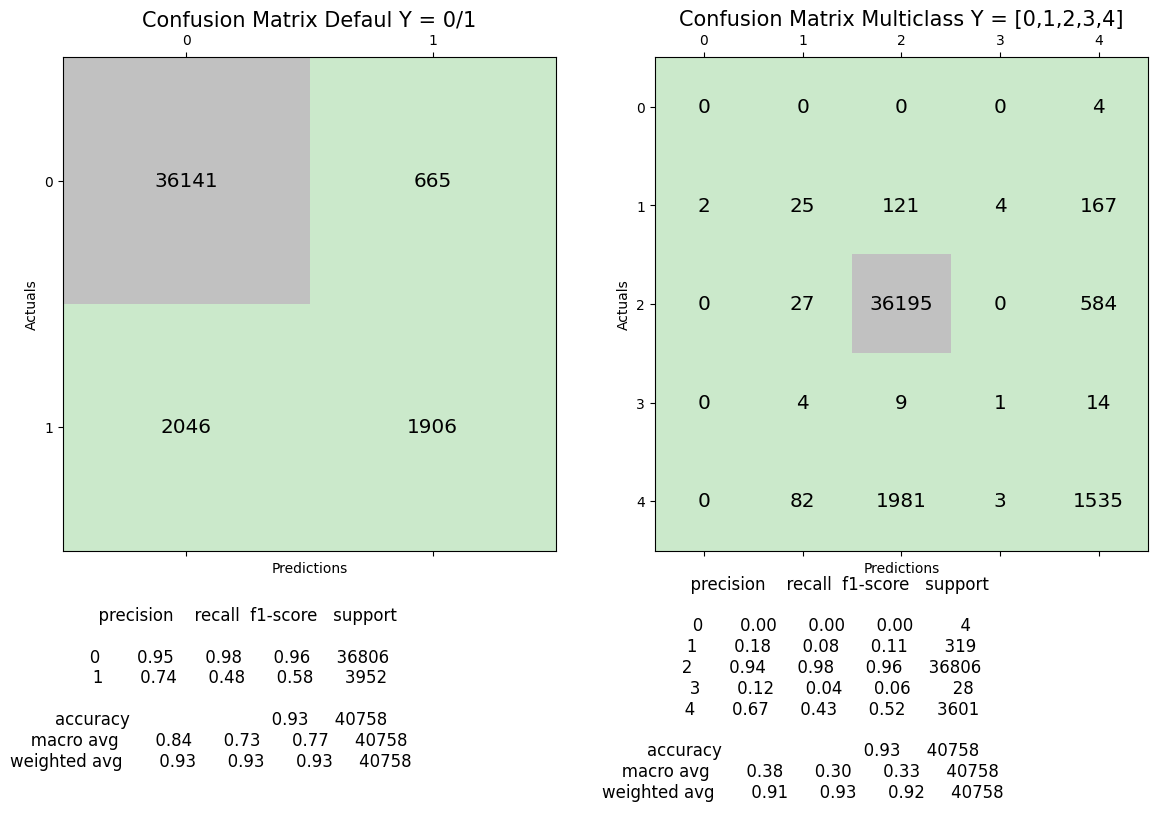

In [70]:
# Create and train the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)

model_label = GradientBoostingClassifier(random_state=seed)
model_label.fit(X_train, y_train_label)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_label = model_label.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_label = accuracy_score(y_test_label, y_pred_label)
conf_matrix_label = confusion_matrix(y_test_label, y_pred_label)
classification_rep_label = classification_report(y_test_label, y_pred_label)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Defaul Y = 0/1', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_label, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_label.shape[0]):
    for j in range(conf_matrix_label.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_label[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Multiclass Y = [0,1,2,3,4]', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_label, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()


4- SHAP Values

5- Redução de Dimensionalidade

In [111]:
# Load pickle file into train and test samples

outfilename = "/content/drive/MyDrive/Colab Notebooks/data/A652.pickle"

file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)

print(f"Shapes A652: ", X_train.shape , X_val.shape , X_test.shape)

Shapes A652:  (10012, 24) (2506, 24) (9582, 24)


In [112]:
# transform y to multiclass

def classify_intensity(value):
    if value == 0:
        return "NONE"
    elif 0 < value <= 5:
        return "WEAK"
    elif 5 < value <= 25:
        return "MODERATE"
    elif 25 < value <= 50:
        return "STRONG"
    elif value > 50:
        return "EXTREME"
    else:
        return "Invalid input"

y_train_multi = np.vectorize(classify_intensity)(y_train)
y_val_multi = np.vectorize(classify_intensity)(y_val)
y_test_multi = np.vectorize(classify_intensity)(y_test)

label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train_multi)
y_val_label = label_encoder.fit_transform(y_val_multi)
y_test_label = label_encoder.fit_transform(y_test_multi)

y_train = (y_train > 0).astype(int)
y_val = (y_val > 0).astype(int)
y_test = (y_test > 0).astype(int)

# Show the label target values
print(y_train_label.shape)
print(y_train.shape)
print(np.unique(y_train_label))
print(np.unique(y_train))

(10012,)
(10012, 1)
[0 1 2 3]
[0 1]


In [130]:
print(y_train.shape)
print(y_train_label.shape)


print(np.unique(y_train,return_counts=True))
print(np.unique(y_train_label,return_counts=True))

(49640, 1)
(49640,)
(array([0, 1]), array([45476,  4164]))
(array([0, 1, 2, 3, 4]), array([    1,   391, 45476,    20,  3752]))


In [121]:
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
classification_rep = classification_report(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
print(accuracy)
print(classification_rep)

0.9301942706618374
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10875
           1       0.70      0.59      0.64      1273

    accuracy                           0.93     12148
   macro avg       0.82      0.78      0.80     12148
weighted avg       0.93      0.93      0.93     12148



In [108]:
# Create and train the GradientBoostingClassifier model default values x tunned values
#Three way hold out method

# first train all models

# Multiclass model Default values
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train_label)

# Multiclass model with tunned params
pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', GradientBoostingClassifier())
])

# Define the parameter grid to search over
param_grid = {
    'pca__n_components': range(3,25,3),  # You can adjust the number of components
}

# Perform grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
best_params = grid_search.best_params_

pca = PCA(n_components = best_params['pca__n_components'])
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_test)
X_test_pca = pca.transform(X_test)
grid = GradientBoostingClassifier(random_state=seed)
grid.fit(X_train_pca, y_train_label)

# second validating

# Make predictions on the test set
y_pred = model.predict(X_val)

y_pred_grid = grid.predict(X_val_pca)

# Evaluate the model
print("Evaluation of Validation values Default x Tunned")
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
print(classification_rep)

accuracy_grid = accuracy_score(y_val, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_val, y_pred_grid)
classification_rep_grid = classification_report(y_val, y_pred_grid)
print(classification_rep_grid)


# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_grid = grid.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
classification_rep_grid = classification_report(y_test, y_pred_grid)


fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Default', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_grid, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_grid.shape[0]):
    for j in range(conf_matrix_grid.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_grid[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Tunned', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_grid, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()


Evaluation of Validation values Default x Tunned
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2277
           1       0.07      0.71      0.12       229
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.07      2506
   macro avg       0.07      0.18      0.03      2506
weighted avg       0.19      0.07      0.01      2506



ValueError: ignored

6 - Agrupamento

In [147]:
# Load pickle file into train and test samples

outfilename = "/content/drive/MyDrive/Colab Notebooks/data/A652.pickle"

file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)

print(f"Shapes A652: ", X_train.shape , X_val.shape , X_test.shape)

Shapes A652:  (10012, 24) (2506, 24) (9582, 24)


In [148]:
# transform y to multiclass

def classify_intensity(value):
    if value == 0:
        return "NONE"
    elif 0 < value <= 5:
        return "WEAK"
    elif 5 < value <= 25:
        return "MODERATE"
    elif 25 < value <= 50:
        return "STRONG"
    elif value > 50:
        return "EXTREME"
    else:
        return "Invalid input"

y_train_multi = np.vectorize(classify_intensity)(y_train)
y_val_multi = np.vectorize(classify_intensity)(y_val)
y_test_multi = np.vectorize(classify_intensity)(y_test)

label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train_multi)
y_val_label = label_encoder.fit_transform(y_val_multi)
y_test_label = label_encoder.fit_transform(y_test_multi)

y_train = (y_train > 0).astype(int)
y_val = (y_val > 0).astype(int)
y_test = (y_test > 0).astype(int)

# Show the label target values
print(y_train_label.shape)
print(y_train.shape)
print(np.unique(y_train_label))
print(np.unique(y_train))

(10012,)
(10012, 1)
[0 1 2 3]
[0 1]


In [141]:
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'random_state': [42]
}

# Initialize KMeans
kmeans = KMeans()

# Define a custom scoring function using silhouette_score
silhouette_scorer = make_scorer(silhouette_score)

# Perform grid search with silhouette score as the metric
grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer, cv=5)
grid_search.fit(X_train)

# Get the best parameters
best_params = grid_search.best_params_

# Fit KMeans with the best parameters on the combined training and validation set
best_kmeans = KMeans(**best_params)
best_kmeans.fit(X_train)

# Get cluster labels for each data point in the combined training and validation set
labels_train_val = best_kmeans.labels_

# Evaluate the silhouette score for the best model on the combined training and validation set
silhouette_avg_train_val = silhouette_score(X_train, labels_train_val)

# Display the results
print(f"Best parameters: {best_params}")
print(f"Silhouette Score with best model on training + validation set: {silhouette_avg_train_val:.2f}")

# Predict clusters on the test set
labels_test = best_kmeans.predict(X_test)

# Evaluate the silhouette score for the best model on the test set
silhouette_avg_test = silhouette_score(X_test, labels_test)

# Display the results for the test set
print(f"Silhouette Score with best model on test set: {silhouette_avg_test:.2f}")

Best parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'random_state': 42}
Silhouette Score with best model on training + validation set: 0.31
Silhouette Score with best model on test set: 0.31


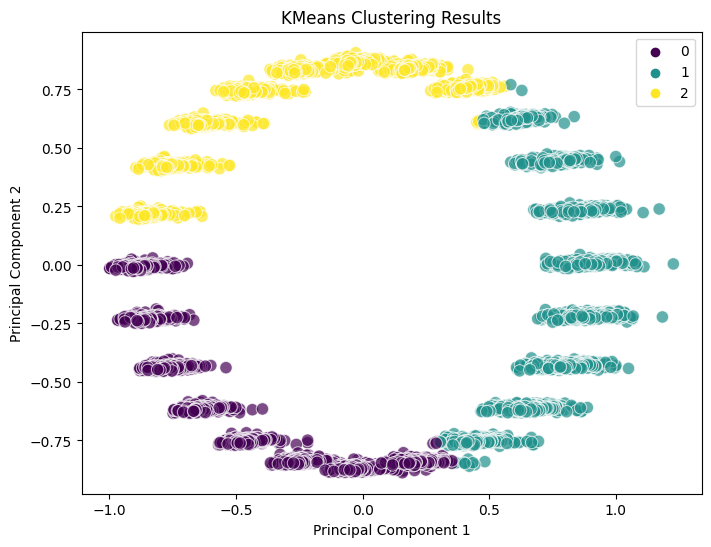

In [152]:
# Apply PCA for visualization (reduce dimensionality to 2 for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Initialize KMeans with the best parameters
best_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
best_kmeans.fit(X_train)

# Get cluster labels for each data point
labels = best_kmeans.labels_

# Create a DataFrame for visualization
df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': labels})

# Plot the clustered data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=80, edgecolor='w', alpha=0.7)
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [150]:
# Define the parameter grid to search over
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5],
    'min_samples': [2, 3, 4, 5],
}

# Generate all combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store the best parameters and silhouette score
best_params = None
best_silhouette_score = -1  # Initialize with a lower value

# Perform "grid search" for each parameter combination on the training + validation set
for params in param_combinations:
    dbscan = DBSCAN(**params)
    labels_train_val = dbscan.fit_predict(X_train)

    # Check if only one cluster is formed
    if len(np.unique(labels_train_val)) > 1:
        # Evaluate the silhouette score for the clustering on training + validation set
        silhouette_avg = silhouette_score(X_train, labels_train_val)

        # Update the best parameters if the silhouette score improves
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = params

# Check if best_params is still None (no valid clustering found)
if best_params is None:
    print("No valid clustering found with the specified hyperparameters.")
else:
    # Fit DBSCAN with the best parameters on the combined training and validation set
    best_dbscan = DBSCAN(**best_params)
    labels_train_val = best_dbscan.fit_predict(X_train)

    # Evaluate the silhouette score for the best model on the combined training and validation set
    silhouette_avg_train_val = silhouette_score(X_train, labels_train_val)

    # Display the results
    print(f"Best parameters: {best_params}")
    print(f"Silhouette Score with best model on training + validation set: {silhouette_avg_train_val:.2f}")

    # Predict clusters on the test set
    labels_test = best_dbscan.fit_predict(X_test)

    # Evaluate the silhouette score for the best model on the test set
    silhouette_avg_test = silhouette_score(X_test, labels_test)

    # Display the results for the test set
    print(f"Silhouette Score with best model on test set: {silhouette_avg_test:.2f}")

Best parameters: {'eps': 0.5, 'min_samples': 3}
Silhouette Score with best model on training + validation set: 0.16
Silhouette Score with best model on test set: 0.18


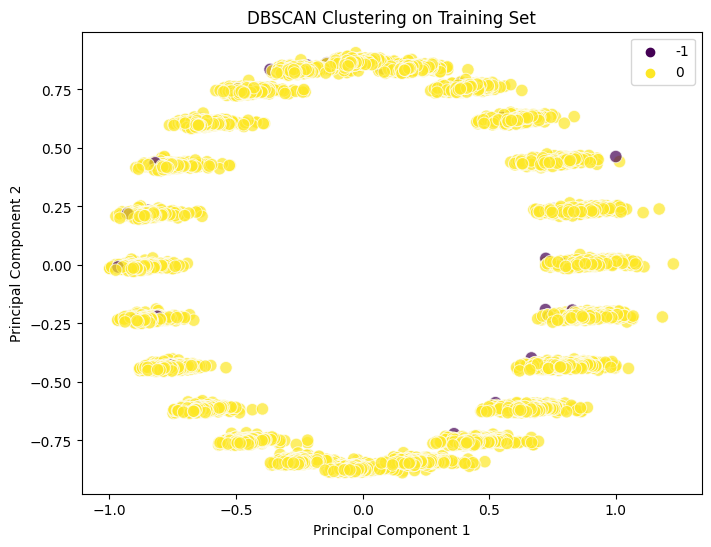

In [153]:
# Apply PCA for visualization (reduce dimensionality to 2 for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create a DataFrame for visualization
df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': labels_train_val})

# Plot the clustered data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=80, edgecolor='w', alpha=0.7)
plt.title('DBSCAN Clustering on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()